In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('DataSet_1_Dirty_2.11.2022 v5 (numerics grouped).csv')

In [3]:
df.rename(columns={"Month of January": "y_actual"}, inplace=True)

In [4]:
df["y_actual"] = ~df["y_actual"].astype(bool)

In [99]:
df = df.drop("email_address", 1)
df

/var/folders/9j/sb9k3k3n66dgyqgmnmvbft8w0000gn/T/ipykernel_67575/623480030.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("email_address", 1)


,sex,country,region,city,contact_number,income_source,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021,y_actual
0,Male,PH,Metro Manila,Parañaque,6.390000e+11,Practice of Profession,36,401,0.000000,0.0,True
1,Male,AE,al karama,Dubai,9.710000e+12,salary,30,401,0.000000,0.0,True
2,male,PH,Nueva Vizcaya,Solano,9.395438e+09,others Allowance,23,395,0.153846,-26375.0,False
3,female,PH,Cebu,Cebu,9.209720e+09,others Salary,34,343,0.000000,0.0,True
4,Male,PH,camarines norte,daet,6.400000e+11,buy and sell used gadgets,39,177,0.000000,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
25892,Female,PH,Pampanga,San Fernando,6.400000e+11,Allowance,21,90,0.000000,0.0,True
25893,Female,PH,Nueva Ecija,Llanera,6.400000e+11,Remittance,31,182,0.000000,0.0,True
25894,Male,QA,Doha,Doha,6.390000e+11,Compensation,43,252,0.000000,0.0,True
25895,Male,PH,muntinlupa,muntinlupa,6.390000e+11,Business,27,98,0.000000,0.0,True


In [6]:
df.shape

(25897, 12)

In [7]:
df = df.drop('email_address', 1)
df

,sex,country,region,city,contact_number,income_source,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021,y_actual
0,Male,PH,Metro Manila,Parañaque,6.390000e+11,Practice of Profession,36,401,0.000000,0.0,True
1,Male,AE,al karama,Dubai,9.710000e+12,salary,30,401,0.000000,0.0,True
2,male,PH,Nueva Vizcaya,Solano,9.395438e+09,others Allowance,23,395,0.153846,-26375.0,False
3,female,PH,Cebu,Cebu,9.209720e+09,others Salary,34,343,0.000000,0.0,True
4,Male,PH,camarines norte,daet,6.400000e+11,buy and sell used gadgets,39,177,0.000000,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
25892,Female,PH,Pampanga,San Fernando,6.400000e+11,Allowance,21,90,0.000000,0.0,True
25893,Female,PH,Nueva Ecija,Llanera,6.400000e+11,Remittance,31,182,0.000000,0.0,True
25894,Male,QA,Doha,Doha,6.390000e+11,Compensation,43,252,0.000000,0.0,True
25895,Male,PH,muntinlupa,muntinlupa,6.390000e+11,Business,27,98,0.000000,0.0,True


In [6]:
X = df.loc[:, 'Age':'Net Deposit Dec 2021']
y = df["y_actual"]

In [7]:
X.head()

,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021
0,36,401,0.000000,0.0
1,30,401,0.000000,0.0
2,23,395,0.153846,-26375.0
3,34,343,0.000000,0.0
4,39,177,0.000000,0.0


In [8]:
y.head()

0     True
1     True
2    False
3     True
4     True
Name: y_actual, dtype: bool

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
np.mean(y_train)

0.740696046724912

In [11]:
y_test.mean()

0.7361003861003861

<AxesSubplot:>

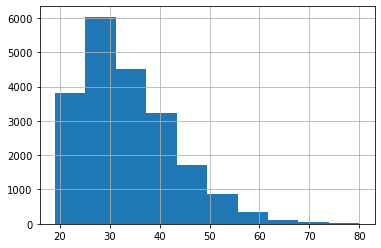

In [12]:
X_train.Age.hist()

In [13]:
df.columns

Index(['email_address', 'sex', 'country', 'region', 'city', 'contact_number',
       'income_source', 'Age', 'Days_being_customer', 'Ratio_2w_to_week',
       'Net Deposit Dec 2021', 'y_actual'],
      dtype='object')

<AxesSubplot:>

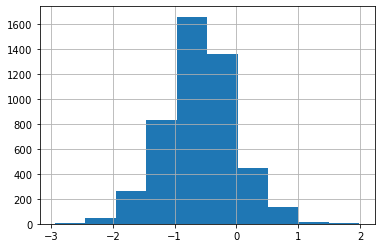

In [14]:
np.log10(df[df["Ratio_2w_to_week"] > 0]["Ratio_2w_to_week"]).hist()

In [16]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

# Oversampling the minority data

In [47]:
import imblearn.over_sampling

In [74]:
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

#create 2x as many negative examples
ratio = {1: n_pos, 0 : n_neg*2}

In [75]:
ROS = imblearn.over_sampling.RandomOverSampler(
                                        sampling_strategy = ratio,
                                        random_state = 42)

In [76]:
X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

In [77]:
X_train_rs

,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021
0,38,387,0.000000,0.0
1,38,250,0.250000,0.0
2,23,270,0.000000,0.0
3,34,93,0.000000,0.0
4,25,131,0.000000,0.0
...,...,...,...,...
26084,36,402,0.000000,0.0
26085,43,263,0.242424,0.0
26086,30,261,0.000000,0.0
26087,24,216,0.333333,700.0


In [78]:
y_train_rs

0         True
1        False
2         True
3         True
4         True
         ...  
26084    False
26085    False
26086    False
26087    False
26088    False
Name: y_actual, Length: 26089, dtype: bool

In [79]:
y_train_rs[y_train_rs == 0]

1        False
7        False
9        False
16       False
21       False
         ...  
26084    False
26085    False
26086    False
26087    False
26088    False
Name: y_actual, Length: 10744, dtype: bool

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lr_model_all = LogisticRegression(C=10000)
lr_model_all.fit(X_train_rs, y_train_rs)
y_prob_pred_train = lr_model_all.predict_proba(X_train)[:,1]
y_prob_pred_test = lr_model_all.predict_proba(X_test)[:,1]

In [81]:
lr_model_all.predict_proba(X_train)

array([[0.40623825, 0.59376175],
       [0.45249669, 0.54750331],
       [0.42056916, 0.57943084],
       ...,
       [0.3839819 , 0.6160181 ],
       [0.69878988, 0.30121012],
       [0.37128704, 0.62871296]])

In [92]:
print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, lr_model_all.predict(X_test)), 
         precision(y_test, lr_model_all.predict(X_test)), 
         recall(y_test, lr_model_all.predict(X_test)),
         F1(y_test, lr_model_all.predict(X_test))
        )
     )

Logistic regression validation metrics: 
 Accuracy: 0.7452 
 Precision: 0.7575 
 Recall: 0.9617 
 F1: 0.8475


In [84]:
print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_train_rs, lr_model_all.predict(X_train_rs)), 
         precision(y_train_r, lr_model_all.predict(X_train_rs)), 
         recall(y_train_rs, lr_model_all.predict(X_train_rs)),
         F1(y_train_rs, lr_model_all.predict(X_train_rs))
        )
     )

Logistic regression validation metrics: 
 Accuracy: 0.6274 
 Precision: 0.6179 
 Recall: 0.9601 
 F1: 0.7519


<AxesSubplot:>

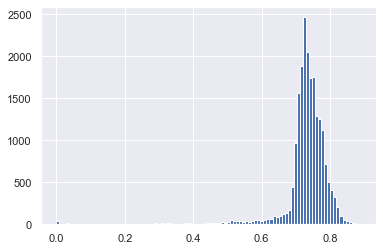

In [33]:
y_train = y_train.to_frame() #Ask why we need this line
y_train["y_prob_pred"] = y_prob_pred_train
y_train["y_prob_pred"].hist(bins=100)

<AxesSubplot:>

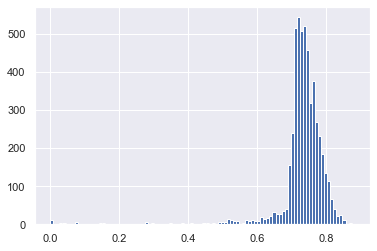

In [34]:
y_test = y_test.to_frame()
y_test["y_prob_pred"] = y_prob_pred_test
y_test["y_prob_pred"].hist(bins=100)

In [21]:
from sklearn.metrics import confusion_matrix, roc_auc_score

In [94]:
#confusion_matrix(y_train["y_actual"], y_train["y_prob_pred"].round())

In [95]:
#confusion_matrix(y_test["y_actual"], y_test["y_prob_pred"].round())

In [42]:
lr_model_all.coef_

array([[ 1.92359678e-02,  3.20494903e-05, -8.99865001e-01,
        -1.01608887e-06]])

In [43]:
np.exp(lr_model_all.coef_)

array([[1.01942217, 1.00003205, 0.40662455, 0.99999898]])

In [83]:
X.columns

Index(['Age', 'Days_being_customer', 'Ratio_2w_to_week',
       'Net Deposit Dec 2021'],
      dtype='object')

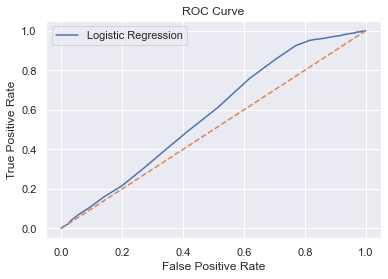

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

def fpr(actuals, preds):
    fp = np.sum((actuals == 0) & (preds == 1))
    tn = np.sum((actuals == 0) & (preds == 0))
    return fp / (fp + tn)    

def plot_ROC_curve(model, X, y):
    
    probs = model.predict_proba(X)[:,1]
    fprs, tprs = [],[]
    
    for p in np.linspace(1,0,100):
        preds = probs >= p
        fprs.append(fpr(y, preds))
        tprs.append(recall(y, preds))
    
    plt.plot(fprs, tprs)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
            
plot_ROC_curve(lr_model_all, X_test, y_test) 
x = np.linspace(0, 1, 10)
plt.plot(x, x, linestyle='--')
plt.legend(['Logistic Regression'])

# Confusion Matrix and Metrics

/Users/lisun/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


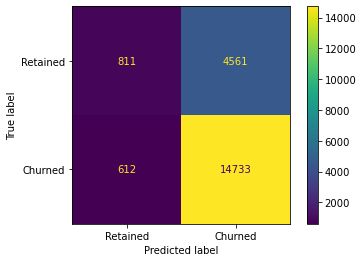

In [87]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_model_all,
                      X_train,
                      y_train,
                      values_format='d',
                      display_labels = ["Retained", "Churned"])

/Users/lisun/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


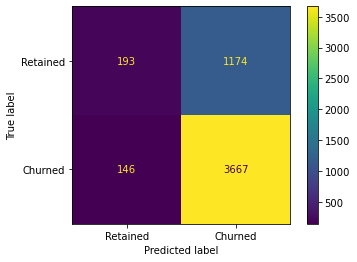

In [88]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_model_all,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels = ["Retained", "Churned"])

In [96]:
print(classification_report(y_train, lr_model_all.predict(X_train)))

              precision    recall  f1-score   support

       False       0.57      0.15      0.24      5372
        True       0.76      0.96      0.85     15345

    accuracy                           0.75     20717
   macro avg       0.67      0.56      0.54     20717
weighted avg       0.71      0.75      0.69     20717



In [97]:
print(classification_report(y_test, lr_model_all.predict(X_test)))

              precision    recall  f1-score   support

       False       0.57      0.14      0.23      1367
        True       0.76      0.96      0.85      3813

    accuracy                           0.75      5180
   macro avg       0.66      0.55      0.54      5180
weighted avg       0.71      0.75      0.68      5180

